<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL_20241S/blob/main/Lecture_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class LinearRegression:

    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (train_output - predictions) * -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,

        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.mp4', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]
Iteration = 1, Loss = 5559.905653275931
Iteration = 1, Loss = 2526.8080345530834
Iteration = 1, Loss = 1150.6882853429986
Iteration = 1, Loss = 526.3412308678338
Iteration = 2, Loss = 243.0742806883238
Iteration = 3, Loss = 114.55575162213374
Iteration = 4, Loss = 56.24675262078634
Iteration = 5, Loss = 29.791895176827836
Iteration = 6, Loss = 17.789297040417374
Iteration = 7, Loss = 12.34370495975999
Iteration = 8, Loss = 9.873033789408545
Iteration = 9, Loss = 8.752087531208495
Iteration = 10, Loss = 8.243512960663084
Iteration = 11, Loss = 8.012772103095253
Iteration = 12, Loss = 7.908084708846023
Iteration = 13, Loss = 7.860587910527032
Iteration = 14, Loss = 7.839038548928838
Iteration = 15, Loss = 7.829261568

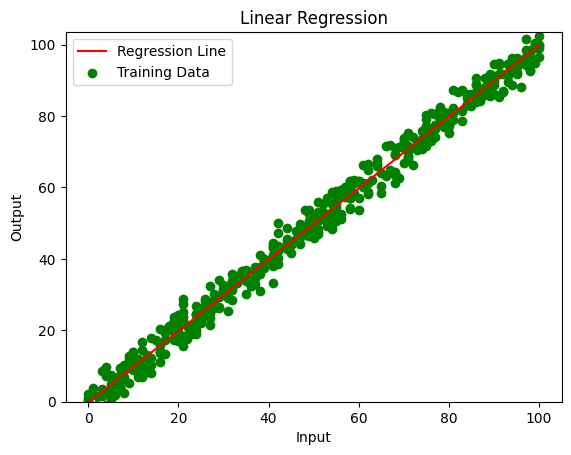

In [ ]:
import pandas as pd
import numpy as np

# URL для загрузки данных
url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'

# Загрузка данных
data = pd.read_csv(url)
print(data)

# Удаление отсутствующих значений
data = data.dropna()

# Обучающий набор данных и метки
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# Проверочный набор данных и метки
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

# Обучение модели линейной регрессии
linear_reg = LinearRegression()
parameters, loss =linear_reg.train(train_input, train_output, 0.0001, 20)

## Реализация байесовской регрессии с использованием Python:

In [2]:
!pip install torch

In [7]:
! pip3 install pyro-ppl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 4.1 MB/s eta 0:00:00


Iteration 100/1000 - Loss: 68686.4717028141
Iteration 200/1000 - Loss: 1957.55493080616
Iteration 300/1000 - Loss: 647.4665781259537
Iteration 400/1000 - Loss: 788.4604915380478
Iteration 500/1000 - Loss: 3308.1984667778015
Iteration 600/1000 - Loss: 20155.736622929573
Iteration 700/1000 - Loss: 2545.918571829796
Iteration 800/1000 - Loss: 515579.78982794285
Iteration 900/1000 - Loss: 1881.5490272045135
Iteration 1000/1000 - Loss: 50892.460729599
Estimated Slope: 0.30964675545692444
Estimated Intercept: 0.31471437215805054
Estimated Sigma: 1.1101857423782349


<ipython-input-8-075ad7192170>:86: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(slope_samples, shade=True, ax=axs[0])
<ipython-input-8-075ad7192170>:92: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(intercept_samples, shade=True, ax=axs[1])
<ipython-input-8-075ad7192170>:98: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sigma_samples, shade=True, ax=axs[2])


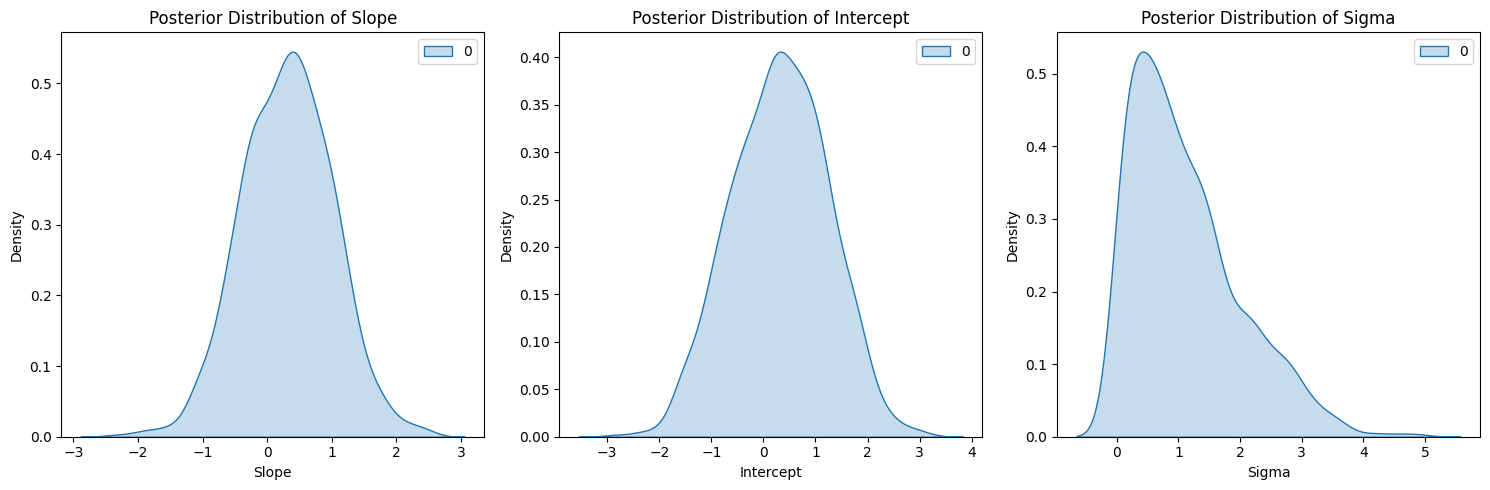

In [8]:
#Метод 1:
#Import the necessary libraries
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO, Predictive
from pyro.optim import Adam
import matplotlib.pyplot as plt
import seaborn as sns


# Generate some sample data
torch.manual_seed(0)
X = torch.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
Y = true_intercept + true_slope * X + torch.randn(100)

# Define the Bayesian regression model
def model(X, Y):
	# Priors for the parameters
	slope = pyro.sample("slope", dist.Normal(0, 10))
	intercept = pyro.sample("intercept", dist.Normal(0, 10))
	sigma = pyro.sample("sigma", dist.HalfNormal(1))

	# Expected value of the outcome
	mu = intercept + slope * X

	# Likelihood (sampling distribution) of the observations
	with pyro.plate("data", len(X)):
		pyro.sample("obs", dist.Normal(mu, sigma), obs=Y)

# Run Bayesian inference using SVI (Stochastic Variational Inference)
def guide(X, Y):
	# Approximate posterior distributions for the parameters
	slope_loc = pyro.param("slope_loc", torch.tensor(0.0))
	slope_scale = pyro.param("slope_scale", torch.tensor(1.0),
							constraint=dist.constraints.positive)
	intercept_loc = pyro.param("intercept_loc", torch.tensor(0.0))
	intercept_scale = pyro.param("intercept_scale", torch.tensor(1.0),
								constraint=dist.constraints.positive)
	sigma_loc = pyro.param("sigma_loc", torch.tensor(1.0),
						constraint=dist.constraints.positive)

	# Sample from the approximate posterior distributions
	slope = pyro.sample("slope", dist.Normal(slope_loc, slope_scale))
	intercept = pyro.sample("intercept", dist.Normal(intercept_loc,
													intercept_scale))
	sigma = pyro.sample("sigma", dist.HalfNormal(sigma_loc))

# Initialize the SVI and optimizer
optim = Adam({"lr": 0.01})
svi = SVI(model, guide, optim, loss=Trace_ELBO())

# Run the inference loop
num_iterations = 1000
for i in range(num_iterations):
	loss = svi.step(X, Y)
	if (i + 1) % 100 == 0:
		print(f"Iteration {i + 1}/{num_iterations} - Loss: {loss}")

# Obtain posterior samples using Predictive
predictive = Predictive(model, guide=guide, num_samples=1000)
posterior = predictive(X, Y)

# Extract the parameter samples
slope_samples = posterior["slope"]
intercept_samples = posterior["intercept"]
sigma_samples = posterior["sigma"]

# Compute the posterior means
slope_mean = slope_samples.mean()
intercept_mean = intercept_samples.mean()
sigma_mean = sigma_samples.mean()

# Print the estimated parameters
print("Estimated Slope:", slope_mean.item())
print("Estimated Intercept:", intercept_mean.item())
print("Estimated Sigma:", sigma_mean.item())


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the posterior distribution of the slope
sns.kdeplot(slope_samples, shade=True, ax=axs[0])
axs[0].set_title("Posterior Distribution of Slope")
axs[0].set_xlabel("Slope")
axs[0].set_ylabel("Density")

# Plot the posterior distribution of the intercept
sns.kdeplot(intercept_samples, shade=True, ax=axs[1])
axs[1].set_title("Posterior Distribution of Intercept")
axs[1].set_xlabel("Intercept")
axs[1].set_ylabel("Density")

# Plot the posterior distribution of sigma
sns.kdeplot(sigma_samples, shade=True, ax=axs[2])
axs[2].set_title("Posterior Distribution of Sigma")
axs[2].set_xlabel("Sigma")
axs[2].set_ylabel("Density")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
!pip install pymc3

In [11]:
!pip install mkl

In [14]:
#Метод 2
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
Y = true_intercept + true_slope * X + np.random.normal(0, 1, size=100)

# Create a PyMC3 model
with pm.Model() as model:
	# Priors for the parameters
	slope = pm.Normal('slope', mu=0, sd=10)
	intercept = pm.Normal('intercept', mu=0, sd=10)
	sigma = pm.HalfNormal('sigma', sd=1)

	# Expected value of the outcome
	mu = intercept + slope * X

	# Likelihood (sampling distribution) of the observations
	Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

	# Run the MCMC sampling
	trace = pm.sample(2000, tune=1000)

# Plot the posterior distributions
pm.plot_posterior(trace, var_names=['slope', 'intercept', 'sigma'])
plt.show()

RuntimeError: 
Could not import 'mkl'.  If you are using conda, update the numpy
packages to the latest build otherwise, set MKL_THREADING_LAYER=GNU in
your environment for MKL 2018.

If you have MKL 2017 install and are not in a conda environment you
can set the Theano flag blas__check_openmp to False.  Be warned that if
you set this flag and don't set the appropriate environment or make
sure you have the right version you *will* get wrong results.
